# Pymaceuticals Inc.
---

### Analysis

- Capomulin seemed to be the drug that had the greatest positive effect on mitigating the size of the tumors in these mice with the least amount of variability
- 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = r"data/Mouse_metadata.csv"
study_results_path = r"data/Study_results.csv"

# Read the mouse data and the study results
mousedf = pd.read_csv(mouse_metadata_path)
studydf = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mergeddf = pd.merge( mousedf,studydf, on='Mouse ID')

# Display the data table for preview
mergeddf.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mergeddf['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe = np.array((mergeddf[mergeddf.duplicated(['Mouse ID', 'Timepoint'], keep=False)].iloc[0]['Mouse ID']), dtype='object')
dupe

array('g989', dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id=mergeddf[mergeddf['Mouse ID']=='g989']
duplicate_mouse_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df=mergeddf[mergeddf['Mouse ID'] != 'g989']
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
print(cleaned_df['Drug Regimen'].unique())
print()
print(cleaned_df.columns)

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean= cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).mean()
median= cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).median()
variance= cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).var()
std= cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).std()
sem= cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).sem()

summary_df= pd.DataFrame({"Mean Tumor Volume":mean, "Median Tumor Volume":median, "Tumor Volume Variance":variance, 
                           "Tumor Volume Std. Dev.":std, "Tumor Volume Std. Err.":sem})
# Assemble the resulting series into a single summary DataFrame.
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
simple_summary= cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
simple_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

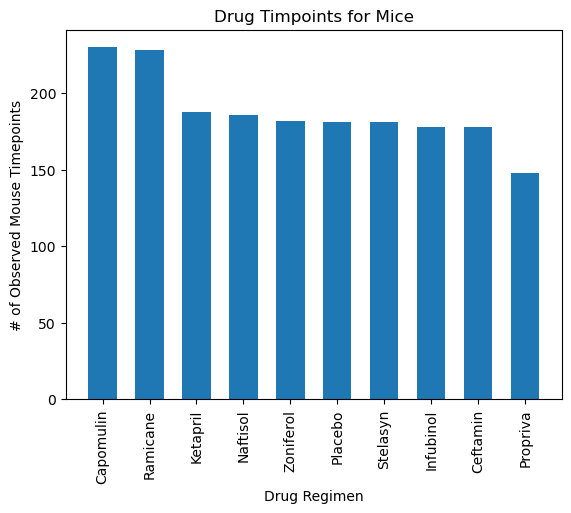

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
x = cleaned_df['Drug Regimen'].value_counts()
plt.bar(x.index, x.values, width=0.6)
plt.xticks(rotation=90)
plt.title('Drug Timpoints for Mice')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

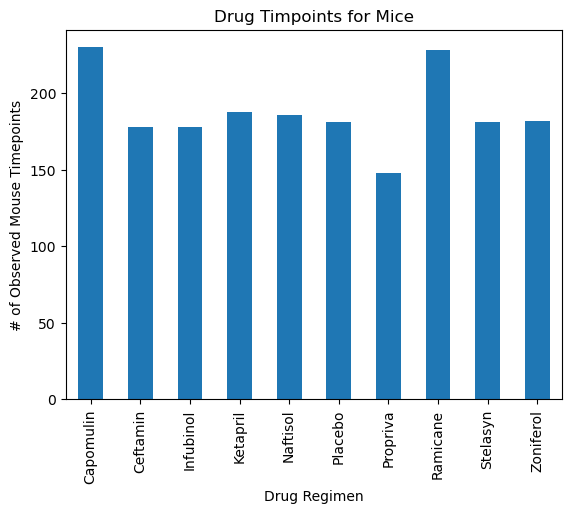

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_values = cleaned_df.groupby(['Drug Regimen', 'Timepoint']).size().reset_index(name='Drugs')
fig, ax = plt.subplots()
x_values.groupby('Drug Regimen')['Drugs'].sum().plot.bar(ax=ax)
ax.tick_params(axis='x', rotation=90)
ax.set_title('Drug Timpoints for Mice')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('# of Observed Mouse Timepoints')
plt.show()

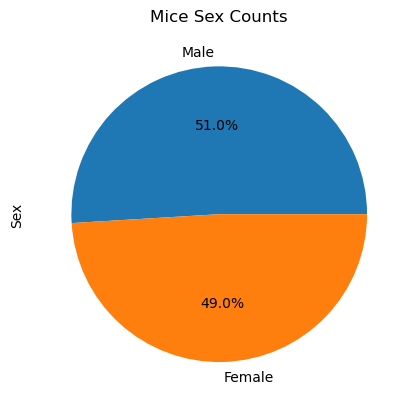

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex=cleaned_df['Sex'].value_counts()
sex.plot.pie(autopct="%1.1f%%")
plt.title('Mice Sex Counts')
plt.show()

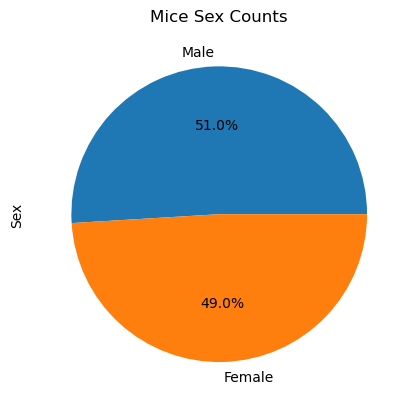

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex=cleaned_df['Sex'].value_counts()
labels=['Male','Female']
fig, ax = plt.subplots()
patches, texts, autotexts = ax.pie(sex, labels=labels, autopct='%1.1f%%')
ax.set_ylabel('Sex')
ax.set_title('Mice Sex Counts')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
cap_df= cleaned_df.loc[cleaned_df['Drug Regimen']=='Capomulin',:]
ram_df= cleaned_df.loc[cleaned_df['Drug Regimen']=='Ramicane',:]
inb_df= cleaned_df.loc[cleaned_df['Drug Regimen']=='Infubinol',:]
cef_df= cleaned_df.loc[cleaned_df['Drug Regimen']=='Ceftamin',:]

# Start by getting the last (greatest) timepoint for each mouse
cap_max= cap_df.groupby('Mouse ID').max()['Timepoint']
ram_max= ram_df.groupby('Mouse ID').max()['Timepoint']
inb_max= inb_df.groupby('Mouse ID').max()['Timepoint']
cef_max= cef_df.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
capdf=pd.DataFrame(cap_max)
ramdf=pd.DataFrame(ram_max)
inbdf=pd.DataFrame(inb_max)
cefdf=pd.DataFrame(cef_max)
cleandf= pd.DataFrame(cleaned_df)

merged_capdf= pd.merge(capdf, cleandf, on=('Mouse ID', 'Timepoint'), how='left')
merged_ramdf= pd.merge(ramdf, cleandf, on=('Mouse ID', 'Timepoint'), how='left')
merged_inbdf= pd.merge(inbdf, cleandf, on=('Mouse ID', 'Timepoint'), how='left')
merged_cefdf= pd.merge(cefdf, cleandf, on=('Mouse ID', 'Timepoint'), how='left')

In [15]:
# Put treatments into a list for for loop (and later for plot labels)
capomulin= merged_capdf[merged_capdf['Drug Regimen']=='Capomulin']
ramicane= merged_ramdf[merged_ramdf['Drug Regimen']=='Ramicane']
infubinol= merged_inbdf[merged_inbdf['Drug Regimen']=='Infubinol']
ceftamin= merged_cefdf[merged_cefdf['Drug Regimen']=='Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
capo=[]
rami=[]
infu=[]
ceft=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


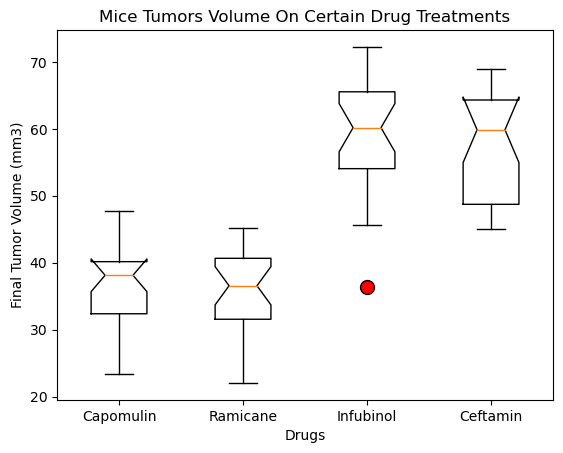

In [33]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
cap_tumor=merged_capdf['Tumor Volume (mm3)']
ram_tumor=merged_ramdf['Tumor Volume (mm3)']
inb_tumor=merged_inbdf['Tumor Volume (mm3)']
cef_tumor=merged_cefdf['Tumor Volume (mm3)']

tumors = [cap_tumor, ram_tumor, inb_tumor, cef_tumor]
Drugs= ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

fig, ax= plt.subplots()
ax.boxplot(tumors, Drugs, flierprops=dict(marker='o', markersize=10, markerfacecolor='red', markeredgecolor='black'))
ax.set_xticklabels(Drugs)
ax.set_xlabel('Drugs')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_title('Mice Tumors Volume On Certain Drug Treatments')
plt.show()

## Line and Scatter Plots

In [17]:
# cleandf['Mouse ID'].unique()

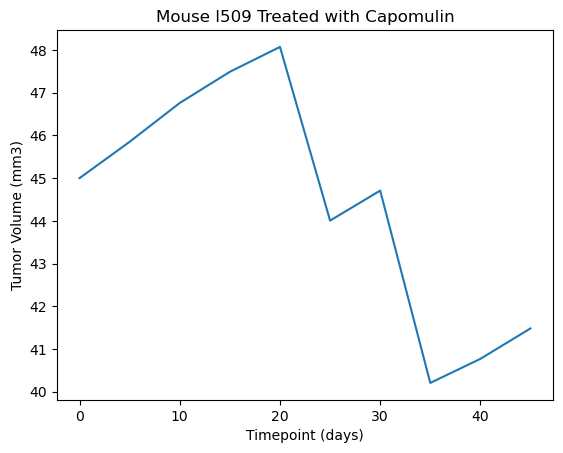

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mousel509= cleandf[cleandf['Mouse ID']=='l509']
l509_tumor= mousel509['Tumor Volume (mm3)']
l509_time= mousel509['Timepoint']

plt.plot(l509_time, l509_tumor)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse l509 Treated with Capomulin')
plt.show()

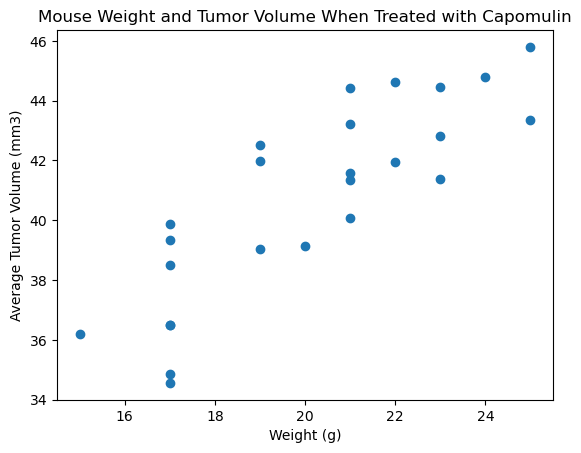

In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_weight= cap_df.groupby('Mouse ID').mean()['Weight (g)']
cap_tumor= cap_df.groupby('Mouse ID').mean()['Tumor Volume (mm3)']

plt.scatter(cap_weight, cap_tumor)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight and Tumor Volume When Treated with Capomulin')
plt.show()

## Correlation and Regression

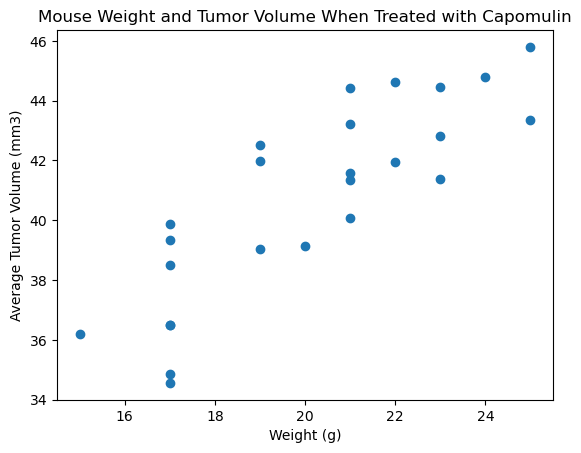

The correlation between mouse weight and the average tumor volume is 0.84.


In [29]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

cap_weight= cap_df.groupby('Mouse ID').mean()['Weight (g)']
cap_tumor= cap_df.groupby('Mouse ID').mean()['Tumor Volume (mm3)']

plt.scatter(cap_weight, cap_tumor)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight and Tumor Volume When Treated with Capomulin')
plt.show()
print(f'The correlation between mouse weight and the average tumor volume is {r_value:.2f}.')

